# Coding Exercise #0108

### 1. MultiIndex:

In [18]:
import pandas as pd
import numpy as np
import os

#### 1.1. Creating a DataFrame with MultiIndex:

In [19]:
my_header = ['A','B','C']

In [20]:
my_index_out = ['G1']*2 + ['G2']*2 + ['G3']*2
my_index_in = ['a', 'b']*3

In [21]:
my_index_zipped = list(zip(my_index_out, my_index_in))
my_index_zipped

[('G1', 'a'), ('G1', 'b'), ('G2', 'a'), ('G2', 'b'), ('G3', 'a'), ('G3', 'b')]

In [22]:
my_multi_index = pd.MultiIndex.from_tuples(my_index_zipped)
df = pd.DataFrame(data=np.random.randn(6,3),index=my_multi_index,columns=my_header)

In [23]:
df

A         B         C
G1 a  1.083366 -0.441018 -0.839411
   b -1.543846  0.046965 -0.192553
G2 a -3.155492  0.537862  0.218022
   b -1.695317 -0.304434 -0.480029
G3 a -0.675374 -0.407977 -1.148775
   b -0.683957 -1.221744  0.122901

#### 1.2. Indexing and slicing DataFrames with MultiIndex:

In [24]:
df.loc['G1']

,A,B,C
a,1.083366,-0.441018,-0.839411
b,-1.543846,0.046965,-0.192553


In [25]:
# Indexing followed by another indexing.
df.loc['G1'].loc['a']

A    1.083366
B   -0.441018
C   -0.839411
Name: a, dtype: float64

In [26]:
# Indexing followed by another indexing.
df.loc['G1'].loc['a','B']

-0.44101784530896493

### 2. DataFrame summarization:

#### 2.1. Group by method:

In [27]:
# Go to the directory where the data file is located. 
os.chdir(r'C:\Users\hoang\Desktop\SIC\jupyter\data')                # Please, replace the path with your own.  

In [28]:
df = pd.read_csv('data_studentlist.csv',header='infer')

In [29]:
df.head(3)

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
2,Brian Martin,M,24,4,N,B,175.0,80.1


In [30]:
# error!!!
# df.groupby('gender').mean()

In [31]:
df.groupby('gender')['height'].mean()

gender
F    166.642857
M    172.410000
Name: height, dtype: float64

In [32]:
df.groupby('gender')[['height','weight']].mean()

,height,weight
gender,,
F,166.642857,50.442857
M,172.410000,68.500000


In [33]:
df.groupby('gender')[['grade','age']].std()

,grade,age
gender,,
F,0.755929,1.069045
M,1.159502,1.159502


In [34]:
df.groupby('gender')['height'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,7.0,166.642857,8.487414,155.2,160.100,168.0,173.1,176.9
M,10.0,172.410000,6.804647,162.2,167.475,172.1,177.9,182.1


In [35]:
sr = df.groupby(['gender','bloodtype'])['height'].mean()     # MultiIndexed result.
sr

gender  bloodtype
F       A            172.450000
        AB           170.100000
        B            158.200000
        O            164.433333
M       A            165.700000
        AB           181.050000
        B            174.550000
        O            166.200000
Name: height, dtype: float64

In [36]:
sr.loc['F']

bloodtype
A     172.450000
AB    170.100000
B     158.200000
O     164.433333
Name: height, dtype: float64

In [37]:
sr.loc['F'].loc['A']

172.45

#### 2.2.  DataFrame methods:

In [38]:
df['height'].apply(lambda x: x/100)

0     1.653
1     1.701
2     1.750
3     1.821
4     1.680
5     1.620
6     1.552
7     1.769
8     1.785
9     1.761
10    1.671
11    1.800
12    1.622
13    1.761
14    1.582
15    1.686
16    1.692
Name: height, dtype: float64

In [39]:
df.sort_values(by='bloodtype')

,name,gender,age,grade,absence,bloodtype,height,weight
16,Andrew King,M,21,1,N,A,169.2,62.2
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5
12,Eddy Johnson,M,21,1,N,A,162.2,55.3
7,Margareth Jones,F,23,1,N,A,176.9,55.0
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
3,David Hassel,M,23,3,N,AB,182.1,85.7
11,John Matsuda,M,22,2,N,AB,180.0,75.8
14,Linda Carter,F,22,2,N,B,158.2,45.2
9,Jake Timmerman,M,22,2,N,B,176.1,61.3
8,John Bertsch,M,23,3,N,B,178.5,64.2


In [40]:
df.sort_values(by='bloodtype', ascending=False)

,name,gender,age,grade,absence,bloodtype,height,weight
0,Jared Diamond,M,23,3,Y,O,165.3,68.2
13,Rebecah Anderson,F,23,3,N,O,176.1,53.1
5,Jennifer Lorentz,F,21,2,N,O,162.0,52.0
6,Susan Clark,F,22,1,N,O,155.2,45.3
10,Joshua Connor,M,24,4,Y,O,167.1,62.0
9,Jake Timmerman,M,22,2,N,B,176.1,61.3
15,Richard Swayze,M,24,4,Y,B,168.6,70.2
14,Linda Carter,F,22,2,N,B,158.2,45.2
8,John Bertsch,M,23,3,N,B,178.5,64.2
2,Brian Martin,M,24,4,N,B,175.0,80.1


In [41]:
df.sort_values(by=['bloodtype','gender'])

,name,gender,age,grade,absence,bloodtype,height,weight
4,Clara Rodriquez,F,20,1,Y,A,168.0,49.5
7,Margareth Jones,F,23,1,N,A,176.9,55.0
12,Eddy Johnson,M,21,1,N,A,162.2,55.3
16,Andrew King,M,21,1,N,A,169.2,62.2
1,Sarah O'Donnel,F,22,2,N,AB,170.1,53.0
3,David Hassel,M,23,3,N,AB,182.1,85.7
11,John Matsuda,M,22,2,N,AB,180.0,75.8
14,Linda Carter,F,22,2,N,B,158.2,45.2
2,Brian Martin,M,24,4,N,B,175.0,80.1
8,John Bertsch,M,23,3,N,B,178.5,64.2


In [42]:
df['bloodtype'].unique()

array(['O', 'AB', 'B', 'A'], dtype=object)

In [43]:
df['bloodtype'].nunique()

4

In [44]:
# Frequency table.
df['bloodtype'].value_counts()

bloodtype
O     5
B     5
A     4
AB    3
Name: count, dtype: int64

In [45]:
# Frequency table.
df['gender'].value_counts()

gender
M    10
F     7
Name: count, dtype: int64

#### 2.3. Pivoting:

In [46]:
my_dict = {"Size": ["L", "L", "M", "M", "M", "S", "S", "S", "S"],
           "Type": ["A", "A", "A", "B", "B", "A", "A", "B", "B"],
            "Location": ["L1", "L1", "L1", "L2", "L2", "L1", "L2", "L2", "L1"],
            "A": [1, 2, 2, 3, 3, 4, 5, 6, 7],
            "B": [2, 4, 5, 5, 6, 6, 8, 9, 9]}
df = pd.DataFrame(my_dict)
df

,Size,Type,Location,A,B
0,L,A,L1,1,2
1,L,A,L1,2,4
2,M,A,L1,2,5
3,M,B,L2,3,5
4,M,B,L2,3,6
5,S,A,L1,4,6
6,S,A,L2,5,8
7,S,B,L2,6,9
8,S,B,L1,7,9


In [47]:
# Index by 'Size' and 'Type'. Columns by 'Location'. Values provided by the 'B' column.
dfr = pd.pivot_table(df, index=['Size','Type'], columns='Location', values='B')      
dfr

Location    L1   L2
Size Type          
L    A     3.0  NaN
M    A     5.0  NaN
     B     NaN  5.5
S    A     6.0  8.0
     B     9.0  9.0

In [48]:
dfr.columns

Index(['L1', 'L2'], dtype='object', name='Location')

In [49]:
dfr.index                                                                 # MultiIndex object!

MultiIndex([('L', 'A'),
            ('M', 'A'),
            ('M', 'B'),
            ('S', 'A'),
            ('S', 'B')],
           names=['Size', 'Type'])

In [50]:
# The same as above, but fill the missing values with 0.
pd.pivot_table(df, index=['Size','Type'], columns='Location', values='B', fill_value=0)

Location    L1   L2
Size Type          
L    A     3.0  0.0
M    A     5.0  0.0
     B     0.0  5.5
S    A     6.0  8.0
     B     9.0  9.0

In [51]:
# The same as above with the aggregation function specified.
pd.pivot_table(df, index=['Size','Type'], columns='Location', values='B', aggfunc = np.mean, fill_value=0)

C:\Users\hoang\AppData\Local\Temp\ipykernel_14508\1347633441.py:2: FutureWarning: The provided callable <function mean at 0x00000135B37BF1A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df, index=['Size','Type'], columns='Location', values='B', aggfunc = np.mean, fill_value=0)


Location    L1   L2
Size Type          
L    A     3.0  0.0
M    A     5.0  0.0
     B     0.0  5.5
S    A     6.0  8.0
     B     9.0  9.0

In [52]:
# Index by ''Location'. Columns by 'Size' and 'Type'. Values provided by the 'B' column.
dfr = pd.pivot_table(df, index='Location', columns=['Size','Type'], values='B')
dfr

Size        L    M         S     
Type        A    A    B    A    B
Location                         
L1        3.0  5.0  NaN  6.0  9.0
L2        NaN  NaN  5.5  8.0  9.0

In [53]:
dfr.index

Index(['L1', 'L2'], dtype='object', name='Location')

In [54]:
dfr.columns                                                           # Now, MultiIndex object for the columns.

MultiIndex([('L', 'A'),
            ('M', 'A'),
            ('M', 'B'),
            ('S', 'A'),
            ('S', 'B')],
           names=['Size', 'Type'])

In [55]:
# The aggregation funciton is numpy.median().
pd.pivot_table(df, index=['Size','Type'], columns='Location', values='B', aggfunc = np.median, fill_value=0)

C:\Users\hoang\AppData\Local\Temp\ipykernel_14508\867171675.py:2: FutureWarning: The provided callable <function median at 0x00000135B3942980> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pd.pivot_table(df, index=['Size','Type'], columns='Location', values='B', aggfunc = np.median, fill_value=0)


Location    L1   L2
Size Type          
L    A     3.0  0.0
M    A     5.0  0.0
     B     0.0  5.5
S    A     6.0  8.0
     B     9.0  9.0

In [56]:
# Group averages of the columns 'A' abd 'B'.
pd.pivot_table(df, index=['Size','Type'], values=['A','B'], aggfunc=np.mean)

C:\Users\hoang\AppData\Local\Temp\ipykernel_14508\1074477442.py:2: FutureWarning: The provided callable <function mean at 0x00000135B37BF1A0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(df, index=['Size','Type'], values=['A','B'], aggfunc=np.mean)


A    B
Size Type          
L    A     1.5  3.0
M    A     2.0  5.0
     B     3.0  5.5
S    A     4.5  7.0
     B     6.5  9.0

In [57]:
# Now, with groupby() method.
# The result is the same. 
df.groupby(['Size','Type'])[['A','B']].mean()

A    B
Size Type          
L    A     1.5  3.0
M    A     2.0  5.0
     B     3.0  5.5
S    A     4.5  7.0
     B     6.5  9.0

In [58]:
# Aggregate differenly the columns 'A' and 'B'.
pd.pivot_table(df, index=['Size','Type'], values=['A','B'], aggfunc={'A':np.max,'B':np.min})

C:\Users\hoang\AppData\Local\Temp\ipykernel_14508\3186243181.py:2: FutureWarning: The provided callable <function max at 0x00000135B37BE7A0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  pd.pivot_table(df, index=['Size','Type'], values=['A','B'], aggfunc={'A':np.max,'B':np.min})
C:\Users\hoang\AppData\Local\Temp\ipykernel_14508\3186243181.py:2: FutureWarning: The provided callable <function min at 0x00000135B37BE8E0> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  pd.pivot_table(df, index=['Size','Type'], values=['A','B'], aggfunc={'A':np.max,'B':np.min})


A  B
Size Type      
L    A     2  2
M    A     2  5
     B     3  5
S    A     5  6
     B     7  9

<Axes: >

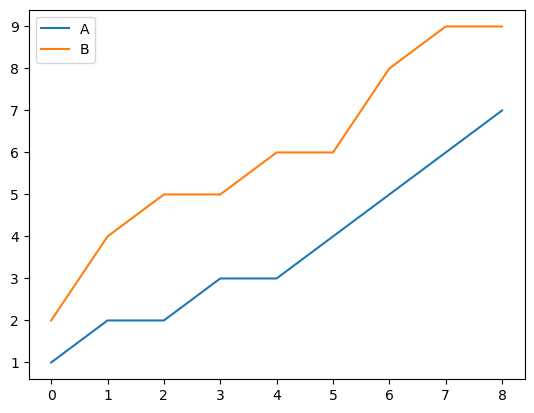

In [59]:
df.plot.line()

Text(0.5, 0, 'Nhãn')

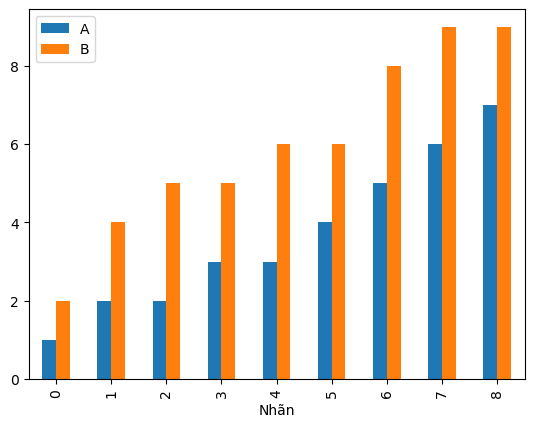

In [66]:
df.plot.bar().set_xlabel('Nhãn')

<Axes: xlabel='Nhãn'>

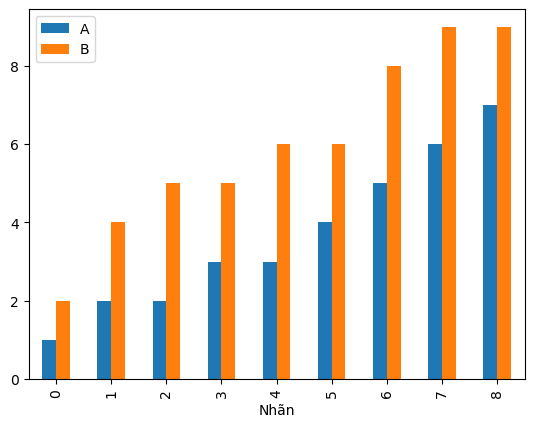

In [67]:

df.plot.bar(xlabel='Nhãn')

In [68]:
plt.bar(color='red')

NameError: name 'plt' is not defined